In [43]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as pltcols
plt.style.use('~/.config/matplotlib/stylelib/paper.mplstyle')

%matplotlib inline

In [38]:
f = np.asarray((0.1,0.2,0.3))
g = (1-0.4) + f*0.4
print g

[ 0.64  0.68  0.72]


In [50]:
def rgba2rgb(c):
    # c is (r,g,b,a) tuple
    # note this is for opaque white background
    # for more complex things reference 
    # https://stackoverflow.com/questions/2049230/convert-rgba-color-to-rgb?rq=1y%
    c2 = np.asarray(c[:-1])
    alph = c[-1]
    c2 = (1.-alph) + c2*alph
    return tuple(c2)

In [5]:
import seaborn as sns
import itertools
sns.set()
sns.set_palette("Spectral",10)
sns.set_style("white")
S = sns.set_style("ticks",{"xtick.major.size":0.8,"ytick.major.size":0.8})
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
palette = itertools.cycle(sns.color_palette())


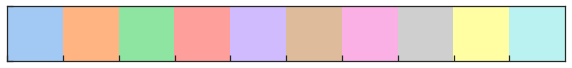

In [6]:
st = "pastel"
sns.set_palette(st)
pal = sns.color_palette(st,10)
palette = itertools.cycle(pal)
# next(palette)
sns.palplot(pal)

In [7]:
collist = []
alpha=0.5
for i in range(len(pal)):
    collist.append(next(palette)+(alpha,))

In [51]:
alpha = 0.3
collist = [
    pltcols.to_rgb("limegreen")+(alpha,),
    pltcols.to_rgb("red")+(alpha,)
]
collist_conv = [rgba2rgb(c) for c in collist]

In [52]:
print collist
print collist_conv

[(0.19607843137254902, 0.803921568627451, 0.19607843137254902, 0.3), (1.0, 0.0, 0.0, 0.3)]
[(0.75882352941176467, 0.94117647058823528, 0.75882352941176467), (1.0, 0.69999999999999996, 0.69999999999999996)]


In [44]:
pltcols.to_rgb("limegreen")

(0.19607843137254902, 0.803921568627451, 0.19607843137254902)

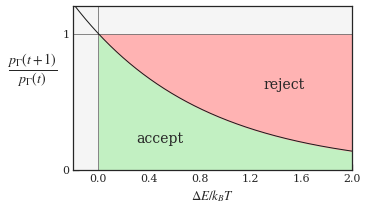

In [53]:
f,ax = plt.subplots(1,1,figsize=(5,3))

x = np.linspace(-0.2,2,1000)
y = np.exp(-x)
ax.plot(x,y,'-',color='k',linewidth=1)

ymax = 1.2
ax.plot([0,0],[0,ymax],'-k')
ax.plot([x[0],x[-1]],[1,1],'-k')

ax.axis([x[0],x[-1],0,ymax])
ax.set_yticks([0,1.0])
ax.set_xticks(np.arange(0,2.1,0.4))

ax.fill_between(x, y, where=x>0, interpolate=True, color=collist_conv[0]) # accept
ax.fill_between(x, np.ones(1000), y, where=x>0, interpolate=True, color=collist_conv[1]) # reject
ax.fill_between(x, 2, where=x<0, interpolate=True, color='whitesmoke')
ax.fill_between(x,np.ones(1000)*2,np.ones(1000), where=x>0, interpolate=True, color='whitesmoke')

ax.set_xlabel(r'$\Delta E/k_BT$')
ax.set_ylabel(r'$\frac{p_\Gamma(t+1)}{p_\Gamma(t)}$',rotation=0,labelpad=30,fontsize=20)

_=ax.text(0.3,0.2,s=r'accept',fontsize=14)
_=ax.text(1.3,0.6,s=r'reject',fontsize=14)

In [55]:
figname = "mc_accrej"
ans = raw_input("You want to save "+figname+"?")
if ans != "no":
    print "Saving fig"
    f.savefig("../doc/figs/"+figname+".eps",bbox_inches='tight',dpi="figure")

You want to save mc_accrej?
Saving fig
